# Capstone project on  Jupyter Notebook
## Small Business Investment in London

***

London's finance industry is based in the City of London and Canary Wharf, the two major business districts in London. London is one of the preeminent financial centers of the world as the most important location for international finance.  We are going to discuss what are the best venues which we can  invest in London, we present an analysis made in phyton and we show step by step how we can determine the top 10 venues for the best 3 Boroughs based on the demographic data, unemployment rate statistics  which it is suggested to invest in London .

The content of this work has five sections:

1. Getting the  the data
2. Data wrangling
3. Methodology
4. Data analysis
5. Results and Discussion



![](http://www.all-free-photos.com/images/londres/PI67079-hr.jpg)
***

> London is one of the most attractive cities to do business in the world. It is the capital of both England and U.K. In this notebook we shows how we can study  data from UK  to understand how and where to invest the money with an small business.

### 1. Getting the  the data

First at all we are going to use iPython based in phyton 3.6 to do the analysis.


#### 1.1 Setup

In the setup part we simply need load all the  libraries needed to do this study that is given by:




In [1]:
# library for BeautifulSoup, for web scrapping
from bs4 import BeautifulSoup
# library to handle data in a vectorized manner
import numpy as np
# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')
!pip -q install geopy
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')
# library to handle requests
import requests
print('requests imported...')
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')
# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')
# install the Geocoder
!pip -q install geocoder
import geocoder
# import time
import time
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
from pandas import ExcelWriter
from pandas import ExcelFile
print('...Done')



numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [3]:
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Selecting the data

In ordering to determine the area of London where we have to do the investment we require take some data from 
the London's Poverty Profile 2017 and Annual Population Survey via Nomis, ONS.
given at the Trust for London [[ 1 ](https://www.trustforlondon.org.uk/data/)], and  New Policy Institute [[ 2 ](https://www.nomisweb.co.uk/query/select/getdatasetbytheme.asp?theme=25)].



The unemployment ratio is the proportion of the working-age population that is unemployed, and in  the unemployment ratio by borough in London is showed in the following figure, that is obtained by the following commands: 

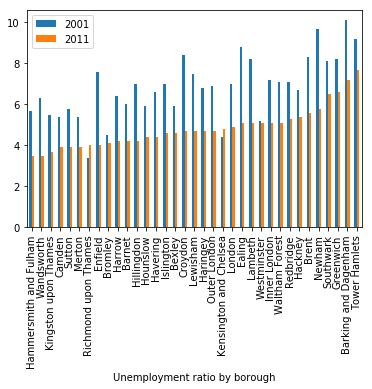

In [5]:
unemployment_ratio_df = pd.read_csv("unemployment_ratio.csv") 
unemployment_ratio_df2=unemployment_ratio_df.dropna()
unemployment_ratio_df2.rename({'Unnamed: 1': '2001', 'Unnamed: 2': '2011'}, axis=1, inplace=True)
unemployment_ratio_df2.reset_index(drop=True, inplace=True)
unemployment_ratio_df2['2011'] = unemployment_ratio_df2['2011'].str[:-1].astype(float)
unemployment_ratio_df2['2001'] = unemployment_ratio_df2['2001'].str[:-1].astype(float)
unemployment_ratio_df3=unemployment_ratio_df2.sort_values(by='2011', ascending=True)
unemployment_ratio_df3.plot(x="Unemployment ratio by borough", y=["2001", "2011"], kind="bar")

### This graph shows that the ratio has come down significantly in almost all London boroughs in a relatively short timescale.

Considering the lowest unemployment ratio by borough we have the following table:

In [7]:
unemployment_ratio_df3.head()

,Unemployment ratio by borough,2001,2011
31,Hammersmith and Fulham,5.7,3.5
30,Wandsworth,6.3,3.5
29,Kingston upon Thames,5.5,3.7
28,Camden,5.4,3.9
27,Sutton,5.8,3.9


The top 3 boroughs with lowest unemployment ratio in 2011 are :

1. Hammersmith and Fulham
2. Wandsworth
3. Kingston upon Thames

Now if we compare with the change of Change in unemployment ratio 2011-13 to 2014-1

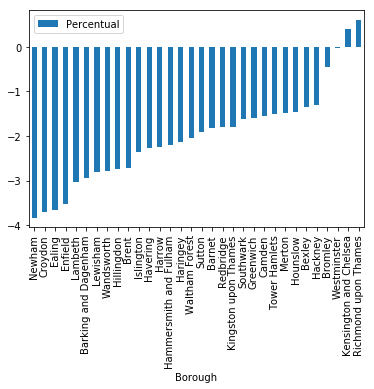

In [8]:
change_unemployment_ratio_df = pd.read_csv("change_unemployment_ratio.csv") 
change_unemployment_ratio_df=change_unemployment_ratio_df.dropna()
change_unemployment_ratio_df.head()
change_unemployment_ratio_df.rename({'Change in unemployment ratio 2011-13 to 2014-16': 'Borough', 'Unnamed: 1': 'Percentual'}, axis=1, inplace=True)
change_unemployment_ratio_df['Percentual'] = change_unemployment_ratio_df['Percentual'].str[:-1].astype(float)
change_unemployment_ratio_df2=change_unemployment_ratio_df.sort_values(by='Percentual', ascending=True)
change_unemployment_ratio_df2.plot(kind='bar',x='Borough',y='Percentual')

In [9]:
change_unemployment_ratio_df2.head(10)

,Borough,Percentual
25,Newham,-3.825
8,Croydon,-3.699
9,Ealing,-3.664
10,Enfield,-3.528
22,Lambeth,-3.031
2,Barking and Dagenham,-2.945
23,Lewisham,-2.804
32,Wandsworth,-2.787
17,Hillingdon,-2.741
5,Brent,-2.724


And  the highest change unemployment ratio are for the Boroughs:

1. Newham
2. Croydon
3. Ealing

But this fact does not guarantee that will be a good place to invest. So in ordering to be sure about which Borough should be the best to invest,we consider the average percentual, this can be a good indication to determine which Borough we should choose.


In [233]:
change_unemployment_ratio_df2["Percentual"].mean()

-1.9897500000000001

therefore arround -1.98%  the Borough shold be stable. 
1. Hammersmith and Fulham has	-2.200%
2. Haringey	-2.134%
3. Waltham Forest	-2.036%

We have those three candidates, but due to Hammersmith and Fulham has the lowest Unemployment , a good candidate to invest  is __Hammersmith and Fulham__ which is located in the South West and North West of London.

Thus we are going to explore what are the possible small bussiness what have a trend over the South West of London.



![](https://occupa.co.uk/wp-content/uploads/2018/09/osl-area-city.jpg)
***

> One of the strongest regions and cities on the planet is London. It’s highly attractive, and it offers one of the best prospects for business development and innovative thinking. London is the showcase for our work throughout Europe and is paramount in our global strategy.

### 2. Data wrangling

Data wrangling sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

In this section we are going to extract more data from different sources of London and transform them into dataframes in ordering to perfom the analytics.

#### 2.1 Exploration of the city of London

In order to transform data from websites into data which we can process we requiere use a great tool called  BeautifulSoup, we load the libraries and we get the List of areas of London.







In [10]:
# library for BeautifulSoup
from bs4 import BeautifulSoup
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
wikipedia_page = requests.get(wikipedia_link)

In [11]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
'''
Extracts every row with corresponding columns then appends the values to the create pd dataframe "df". The first row (row[0]) is skipped because it is already the header
'''
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)
        df

In [12]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [2]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[3]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[3],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[3],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [13]:
df.columns = ['Location', 'Borough', 'Post-town', 'Postcode',
       'Dial-code', 'OSgridref']

In [14]:
df.columns

Index(['Location', 'Borough', 'Post-town', 'Postcode', 'Dial-code',
       'OSgridref'],
      dtype='object')

In [15]:
df.head()

,Location,Borough,Post-town,Postcode,Dial-code,OSgridref
0,Abbey Wood,"Bexley, Greenwich [2]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[3]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[3],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[3],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


We have to perfomr some cleaning with the following command

In [16]:
# Remove Borough reference numbers with []
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [17]:
df.head()

,Location,Borough,Post-town,Postcode,Dial-code,OSgridref
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


We are going now to do some assumptions to reduce the amount of data that we want to process.

The postcodes are spread to multi-rows and assigned the same values from the other columns.

In [18]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [19]:
df0.head()

,Location,Borough,Post-town,Dial-code,OSgridref,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
2,Addington,Croydon,CROYDON,020,TQ375645,CR0
3,Addiscombe,Croydon,CROYDON,020,TQ345665,CR0


From the data, only the ‘Location’, ‘Borough’, ‘Postcode’, ‘Post-town’ will be used.

In [20]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

In [21]:
df1.head()

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Addington,Croydon,CR0,CROYDON
4,Addiscombe,Croydon,CR0,CROYDON


Now, only the Boroughs with London Post-town will be used for our search of location.
Therefore, all the non-post-town are dropped.

In [22]:
df2 = df1 # assigns df1 to df2
df21 = df2[df2['Post-town'].str.contains('LONDON')]


In [26]:
df21.shape

(380, 4)

In [27]:
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [28]:
df3.head()

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Aldgate,City,EC3
4,Aldwych,Westminster,WC2


Due to the study of the Bouroughts,  Hammersmith and Fulham  are in the  North  West and  South West areas of London. For this project the  South West will be considered for our analysis. The south west areas has postcodes starting with SW

In [29]:
df_london = df3 # re-assigns to df_london
# Strips whitespaces before postcode
df_london.Postcode = df_london.Postcode.str.strip()
# New dataframe for South East London postcodes - df_se
df_sw = df_london[df_london['Postcode'].str.startswith(('SW'))].reset_index(drop=True)

In [30]:
df_sw.head(10)

,Location,Borough,Postcode
0,Balham,Wandsworth,SW12
1,Barnes,Richmond upon Thames,SW13
2,Battersea,Wandsworth,SW11
3,Belgravia,Westminster,SW1
4,Brixton,Lambeth,SW2
5,Brixton,Lambeth,SW9
6,Brompton,Kensington and ChelseaHammersmith and Fulham,SW3
7,Castelnau,Richmond upon Thames,SW13
8,Chelsea,Kensington and Chelsea,SW3
9,Clapham,"Lambeth, Wandsworth",SW4


We are intterested to see the demography of London for white people.

In [31]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
demograph_page = requests.get(demograph_link)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
 for i in rows1[0].find_all('th')]
demo_london = pd.DataFrame(columns = columns1)
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)
demo_london

,Local authority,White,Mixed,Asian,Black,Other
0,Barnet,64.1,4.8,18.5,7.7,4.9
1,Barking and Dagenham,58.3,4.2,15.9,20,1.6
2,Bexley,81.9,2.3,6.6,8.5,0.8
3,Brent,36.3,5.1,34.1,18.8,5.8
4,Bromley,84.3,3.5,5.2,6,0.9
5,Camden,66.3,5.6,16.1,8.2,3.8
6,City of London,78.6,3.9,12.7,2.6,2.1
7,Croydon,55.1,6.6,16.4,20.2,1.8
8,Ealing,49,4.5,29.7,10.9,6
9,Enfield,61,5.5,11.2,17.2,5.1


In [32]:
#converting string to float

In [33]:
demo_london['White'] = demo_london['White'].astype('float')
demo_london_sorted = demo_london.sort_values(by='White', ascending = False)


In [34]:
demo_london_sorted.head(10)

,Local authority,White,Mixed,Asian,Black,Other
14,Havering,87.7,2.1,4.9,4.8,0.6
26,Richmond upon Thames,86.0,3.6,7.3,1.5,1.6
4,Bromley,84.3,3.5,5.2,6,0.9
2,Bexley,81.9,2.3,6.6,8.5,0.8
6,City of London,78.6,3.9,12.7,2.6,2.1
28,Sutton,78.6,3.8,11.6,4.8,1.3
20,Kingston upon Thames,74.5,3.9,16.3,2.5,2.7
31,Wandsworth,71.4,5,10.9,10.7,2.1
19,Kensington and Chelsea,70.6,5.7,10,6.5,7.2
18,Islington,68.2,6.5,9.2,12.8,3.4


In [35]:
demo_london_sorted["White"].mean()

61.584848484848486

 Considering the  the top 6 areas 
 with higher of the average  white people around > 61.58% we have the following list of Boroughs: 

1. Hammersmith and Fulham	68.1%
2.	Camden	66.3%
3.	Merton	64.9%
4.	Barnet	64.1%
5.	Greenwich	62.5%
6.	Westminster	61.7%
 

 
 

In [36]:
df_sw_top = df_sw[df_sw['Borough'].isin(['Hammersmith and Fulham','Camden', 'Merton', 'Barnet','Greenwich', 'Westminster'])].reset_index(drop=True)


In [37]:
df_sw_top

,Location,Borough,Postcode
0,Belgravia,Westminster,SW1
1,Colliers Wood,Merton,SW19
2,Fulham,Hammersmith and Fulham,SW6
3,Knightsbridge,Westminster,SW1
4,Merton Park,Merton,SW19
5,Millbank,Westminster,SW1
6,Parsons Green,Hammersmith and Fulham,SW6
7,Pimlico,Westminster,SW1
8,Raynes Park,Merton,SW20
9,Sands End,Hammersmith and Fulham,SW6


In [38]:
df_sw_top.shape

(15, 3)

In [39]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [40]:
sample = get_latlng('SW6')

In [41]:
sample

[51.47772000000003, -0.2014499999999657]

In [42]:
ga = geocoder.geocodefarm(sample, method = 'reverse')
ga


<[OK] Geocodefarm - Reverse [687b Fulham Road, London, SW6 5UJ, United Kingdom]>

In [43]:
start = time.time()
postal_codes = df_sw_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]
end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  12.370892524719238 seconds


Then we proceed to store the location data — latitude and longitude as follows. The obtained coordinates are then joined to df_sw_topto create new data frame.

In [44]:
df_sw_loc = df_sw_top
# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_sw_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_sw_loc['Latitude'] = df_sw_coordinates['Latitude']
df_sw_loc['Longitude'] = df_sw_coordinates['Longitude']
df_sw_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Belgravia,Westminster,SW1,51.49713,-0.13829
1,Colliers Wood,Merton,SW19,51.42170,-0.20796
2,Fulham,Hammersmith and Fulham,SW6,51.47772,-0.20145
3,Knightsbridge,Westminster,SW1,51.49713,-0.13829
4,Merton Park,Merton,SW19,51.42170,-0.20796


In [45]:
df_sw_loc.shape

(15, 5)

In orderting to use Foursquare, it is needed the credentials, that are saved in the file credential.json

In [46]:
import json
filename = 'credential.json'
with open(filename) as f:
    data = json.load(f)

In [47]:
CLIENT_ID = data['CLIENT_ID'] #Foursquare )FS) ID
CLIENT_SECRET = data['CLIENT_SECRET'] # FS Secret
VERSION = data['VERSION'] # FS API version

In [48]:

#LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

## 3. Methodology



With the Foursquare site, we are going to obtain a data set of stores around specific locations, which will be stored into a data frame and with that, it is possible to do the analytics.

First, we will proceed with the exploration and the collecting of data over a single Neighbourhood and later we proceed the same procedure with multiple Neighbourhoods storing a data frame.

The following step is get the cluster of the venues by location and identify the top most cooomon venues by cluster.

### 3.1 Data Exploration
####  Single Neighbourhood 

An initial exploration of a single Neighbourhood within the London area was done to examine the Foursquare.

In [49]:
# Resets the current index to a new
sw_df = df_sw_loc.reset_index().drop('index', axis = 1)
sw_df.loc[sw_df['Location'] == 'Fulham']

,Location,Borough,Postcode,Latitude,Longitude
2,Fulham,Hammersmith and Fulham,SW6,51.47772,-0.20145


let’s use the Fulham with the index location 2 as shown below:

In [50]:
Fulham_lat = sw_df.loc[2, 'Latitude']
Fulham_long = sw_df.loc[2, 'Longitude']
Fulham_loc = sw_df.loc[2, 'Location']
Fulham_postcode = sw_df.loc[2, 'Postcode']
print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(Fulham_loc, Fulham_postcode, Fulham_lat, Fulham_long))

The latitude and longitude values of Fulham with postcode SW6, are 51.47772000000003, -0.2014499999999657.


Let’s explore the top 50 venues that are within a 1500 metres radius of Fulham . And then, let’s create the GET request URL, and then the url is named.

In [51]:
# Credentials are provided already for this part
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Fulham_lat, 
    Fulham_long, 
    radius, 
    LIMIT)
# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VV415VZUJXDXFEELDKJ45UIUKUEY1R2X3MUUEO5PBVHCQ5XB&client_secret=RPJJV01CL5EG31FBDK1FTWD4BMCJZVXVR0LWIWD03QQBI3N0&v=20180604&ll=51.47772000000003,-0.2014499999999657&radius=1500&limit=50'

In [52]:
results = requests.get(url).json()


From the results, the necessary information needs to be obtained from items key. 
To do this, the get_category_type function is used from the Foursquare.

In [53]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The result is then cleaned up from json to a structured pandas dataframe as shown below:

In [54]:
import numpy as np
import pandas as pd

In [55]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head(10)

,name,categories,lat,lng
0,GAIL's Bakery,Bakery,51.476830,-0.202668
1,Local Hero,Café,51.476264,-0.204713
2,Baileys Fish & Chips,Fish & Chips Shop,51.480452,-0.203987
3,The Power Yoga Company,Yoga Studio,51.474317,-0.204456
4,Nuntee Thai Cuisine,Thai Restaurant,51.476795,-0.203420
5,The White Horse,Pub,51.474319,-0.200482
6,Parsons Green,Park,51.474922,-0.206278
7,Shot Espresso,Coffee Shop,51.480614,-0.198148
8,The Climbing Hangar,Climbing Gym,51.476383,-0.199611
9,Chairs & Coffee,Coffee Shop,51.479713,-0.198987


In [56]:
nearby_venues_Fulham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')


The most common venues in Fulhan are:

In [61]:
nearby_venues_Fulham_unique.head(5)

,Count
Café,9
Pizza Place,4
Pub,3
Gastropub,2
Fish & Chips Shop,2


So in Fulham the top nearby venues are cafe, pizza place, pub, gastropub and fish & chips Shop.

#### Multiple Neighbourhoods 

In ordering to repeat the previous procedure applied to multiple Neighbourhoods, we define a function:

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

and we use this function by using our data frame sw_df as follows:

In [63]:
sw_venues = getNearbyVenues(names=sw_df['Location'],
                                   latitudes=sw_df['Latitude'],
                                   longitudes=sw_df['Longitude']
                                  )

Belgravia
Colliers Wood
Fulham
Knightsbridge
Merton Park
Millbank
Parsons Green
Pimlico
Raynes Park
Sands End
South Wimbledon
St James's
Westminster
Wimbledon
Wimbledon


In [64]:
sw_venues.shape

(714, 7)

In [65]:
sw_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Belgravia,51.49713,-0.13829,Taj 51 Buckingham Gate Suites & Residences,51.498598,-0.137404,Hotel
1,Belgravia,51.49713,-0.13829,Curzon Victoria,51.497473,-0.136744,Movie Theater
2,Belgravia,51.49713,-0.13829,Iris & June,51.496791,-0.136011,Coffee Shop
3,Belgravia,51.49713,-0.13829,Run & Become,51.498128,-0.135426,Sporting Goods Shop
4,Belgravia,51.49713,-0.13829,Quilon,51.498772,-0.137522,Indian Restaurant


The number of venues returned for each neighbourhoods is then explored as follows

In [66]:
sw_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Belgravia,50,50,50,50,50,50
Colliers Wood,50,50,50,50,50,50
Fulham,50,50,50,50,50,50
Knightsbridge,50,50,50,50,50,50
Merton Park,50,50,50,50,50,50
Millbank,50,50,50,50,50,50
Parsons Green,50,50,50,50,50,50
Pimlico,50,50,50,50,50,50
Raynes Park,32,32,32,32,32,32


Then we check how many unique categories all the returned venues. See as follows

In [69]:
print('There are {} uniques categories.'.format(len(sw_venues['Venue Category'].unique())))

There are 79 uniques categories.


In [70]:
sw_venue_unique_count = sw_venues['Venue Category'].value_counts().to_frame(name='Count')

In [71]:
sw_venue_unique_count.head()

,Count
Coffee Shop,59
Hotel,38
Sushi Restaurant,28
Pub,27
Theater,24


### 3.2 Clustering

In [75]:
address = 'London, United Kingdom'
geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [76]:
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

In [77]:
# Adding markers to map
for lat, lng, borough, loc in zip(sw_df['Latitude'], 
                                  sw_df['Longitude'],
                                  sw_df['Borough'],
                                  sw_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

We  see four points which corresponds to our four postcodes that we want to analize.

In [79]:
sw_df

,Location,Borough,Postcode,Latitude,Longitude
0,Belgravia,Westminster,SW1,51.49713,-0.13829
1,Colliers Wood,Merton,SW19,51.42170,-0.20796
2,Fulham,Hammersmith and Fulham,SW6,51.47772,-0.20145
3,Knightsbridge,Westminster,SW1,51.49713,-0.13829
4,Merton Park,Merton,SW19,51.42170,-0.20796
5,Millbank,Westminster,SW1,51.49713,-0.13829
6,Parsons Green,Hammersmith and Fulham,SW6,51.47772,-0.20145
7,Pimlico,Westminster,SW1,51.49713,-0.13829
8,Raynes Park,Merton,SW20,51.41117,-0.22623
9,Sands End,Hammersmith and Fulham,SW6,51.47772,-0.20145


### 4. Data analysis

In this section, the objective is to check and explore the venues in each neighbourhood.

In [81]:
# one hot encoding
sw_onehot = pd.get_dummies(sw_venues[['Venue Category']], prefix = "", prefix_sep = "")

Then the Neighbourhoodcolumn is added back to the dataframe.

In [82]:
# add neighborhood column back to dataframe
sw_onehot['Neighborhood'] = sw_venues['Neighborhood']

In [83]:
# move neighborhood column to the first column
fixed_columns = [sw_onehot.columns[-1]] + list(sw_onehot.columns[:-1])
sw_onehot = sw_onehot[fixed_columns]

In [84]:
sw_onehot.head(5)

,Neighborhood,Argentinian Restaurant,Art Gallery,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Creperie,Cycle Studio,Department Store,Diner,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Optical Shop,Park,Pedestrian Plaza,Pharmacy,Pizza Place,Platform,Pub,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Belgravia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Belgravia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Belgravia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Belgravia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Belgravia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
# To check the Bakery:


In [86]:
#sw_onehot.loc[sw_onehot['Bakery'] != 0]


Regrouping and Category Statistics


In [87]:
sw_grouped = sw_onehot.groupby('Neighborhood').mean().reset_index()


Grouping of each Neighbourhoods with 10 common venues:


In [88]:
num_top_venues = 10 # Top common venues needed
for hood in sw_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sw_grouped[sw_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Belgravia----
                  venue  freq
0                 Hotel  0.12
1           Coffee Shop  0.08
2               Theater  0.08
3        Sandwich Place  0.06
4             Juice Bar  0.04
5      Sushi Restaurant  0.04
6  Gym / Fitness Center  0.02
7    Falafel Restaurant  0.02
8  Fast Food Restaurant  0.02
9     French Restaurant  0.02


----Colliers Wood----
                  venue  freq
0      Sushi Restaurant  0.08
1           Coffee Shop  0.08
2                   Pub  0.08
3                   Bar  0.06
4     Indian Restaurant  0.04
5      Stationery Store  0.04
6          Burger Joint  0.04
7         Grocery Store  0.04
8           Pizza Place  0.02
9  Gym / Fitness Center  0.02


----Fulham----
                venue  freq
0                Café  0.12
1         Coffee Shop  0.10
2                 Pub  0.06
3  Italian Restaurant  0.06
4         Yoga Studio  0.04
5                Park  0.04
6       Grocery Store  0.04
7           Gastropub  0.04
8   French Restaurant  0.04
9

Creating new dataframe 
Putting the common venues into pandas dataframe, the following return_most_common_venuesis used to sort the venues in descending order.

In [89]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Then we create a new panda dataframe with 10 most common venues as shown below:

In [90]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = sw_grouped['Neighborhood']
for ind in np.arange(sw_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sw_grouped.iloc[ind, :], num_top_venues)
neighbourhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Belgravia,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
1,Colliers Wood,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant
2,Fulham,Café,Coffee Shop,Italian Restaurant,Pub,Yoga Studio,Grocery Store,Wine Shop,Park,French Restaurant,Climbing Gym
3,Knightsbridge,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
4,Merton Park,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant


Clustering of Neighbourhoods
We create the grouped clustering for the neighbourhood as shown below:


In [91]:
sw_grouped_clustering = sw_grouped.drop('Neighborhood', 1)


And then create clusters of the neighbourhood using the k-means to cluster the neighbourhood into 5 cluster

In [92]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(sw_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 2, 0, 1, 0, 2, 0, 3, 2])

Now creating a new dataframe that includes the clusters as well as the top 10 venues for each neighbourhoods.

In [93]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sw_merged = sw_df
# match/merge SE London data with latitude/longitude for each neighborhood
sw_merged_latlong = sw_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on = 'Location')
sw_merged_latlong.head(5)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Belgravia,Westminster,SW1,51.49713,-0.13829,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
1,Colliers Wood,Merton,SW19,51.42170,-0.20796,1,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant
2,Fulham,Hammersmith and Fulham,SW6,51.47772,-0.20145,2,Café,Coffee Shop,Italian Restaurant,Pub,Yoga Studio,Grocery Store,Wine Shop,Park,French Restaurant,Climbing Gym
3,Knightsbridge,Westminster,SW1,51.49713,-0.13829,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
4,Merton Park,Merton,SW19,51.42170,-0.20796,1,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant



## 5. Results 
To visualize the clusters, we have the following

In [94]:
sw_clusters=sw_merged_latlong

In [95]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [96]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sw_clusters['Latitude'], sw_clusters['Longitude'], sw_clusters['Location'], sw_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [97]:
display(map_clusters)

The individual clsuters dataframe can be obtained by using the following code (better to run each cluster individually:

In [98]:
# Cluster 1
cluster1=sw_clusters.loc[sw_clusters['Cluster Labels'] == 0, sw_clusters.columns[[1] + list(range(5, sw_clusters.shape[1]))]]


In [99]:
# Cluster 2
cluster2=sw_clusters.loc[sw_clusters['Cluster Labels'] == 1, sw_clusters.columns[[1] + list(range(5, sw_clusters.shape[1]))]]


In [100]:
# Cluster 3
cluster3=sw_clusters.loc[sw_clusters['Cluster Labels'] == 2, sw_clusters.columns[[1] + list(range(5, sw_clusters.shape[1]))]]

In [101]:
# Cluster 4
cluster4=sw_clusters.loc[sw_clusters['Cluster Labels'] == 3, sw_clusters.columns[[1] + list(range(5, sw_clusters.shape[1]))]]

In [102]:
# Cluster 5
cluster5=sw_clusters.loc[sw_clusters['Cluster Labels'] == 4, sw_clusters.columns[[1] + list(range(5, sw_clusters.shape[1]))]]

In [103]:
cluster1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
3,Westminster,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
5,Westminster,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
7,Westminster,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
11,Westminster,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store
12,Westminster,0,Hotel,Theater,Coffee Shop,Sandwich Place,Juice Bar,Sushi Restaurant,Indian Restaurant,Movie Theater,Modern European Restaurant,Clothing Store


In [104]:
cluster2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Merton,1,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant
4,Merton,1,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant
10,Merton,1,Pub,Coffee Shop,Sushi Restaurant,Bar,Indian Restaurant,Stationery Store,Burger Joint,Grocery Store,Movie Theater,Mexican Restaurant


In [105]:
cluster3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Hammersmith and Fulham,2,Café,Coffee Shop,Italian Restaurant,Pub,Yoga Studio,Grocery Store,Wine Shop,Park,French Restaurant,Climbing Gym
6,Hammersmith and Fulham,2,Café,Coffee Shop,Italian Restaurant,Pub,Yoga Studio,Grocery Store,Wine Shop,Park,French Restaurant,Climbing Gym
9,Hammersmith and Fulham,2,Café,Coffee Shop,Italian Restaurant,Pub,Yoga Studio,Grocery Store,Wine Shop,Park,French Restaurant,Climbing Gym


In [106]:
cluster4

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Merton,3,Bus Stop,Platform,Grocery Store,Fast Food Restaurant,Coffee Shop,Pharmacy,Indian Restaurant,BBQ Joint,Trail,Bakery


In [107]:
cluster5

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Merton,4,Coffee Shop,Pub,Grocery Store,Bus Stop,Sushi Restaurant,Indian Restaurant,Bar,Burger Joint,Platform,Gym / Fitness Center
14,Merton,4,Coffee Shop,Pub,Grocery Store,Bus Stop,Sushi Restaurant,Indian Restaurant,Bar,Burger Joint,Platform,Gym / Fitness Center


# Conclusion

According to the latest Land Registry figures Westminster is one the most expensive boroughs to buy a property to live in London. Slightly less than a million – £990,896, is the average cost of property to buy in City of Westminster. However, considering having a view on London Eye or Big Ben while eating breakfast, houseprices in this area sound to be reasonable.  The Hammersmith and Fulham  has  avg. £784,613 cost of property.

So the conclusion should be invest in  one of the common venue : 
## Hammersmith and Fulham


1. Café
2. Coffee Shop
3. Italian Restaurant
4. Pub
5. Yoga Studio
6. Grocery Store
7. Wine Shop
8. Park
9. French Restaurant
10. Climbing Gy
             


## Westminster

1. Hotel
2. Theater
3. Coffee Sho
4. Sandwich Place
5. Juice Bar
6. Sushi Restaurant
7. Indian Restaurant
8. Movie Theater
9. Modern European Restaurant
10. Clothing Store

## Merton

1. Pub
2. Coffee Shop
3. Sushi Restaurant
4. Bar
5. Indian Restaurant
6. Stationery Store
7. Burger Joint
8. Grocery Store
9. Movie Theater
10. Mexican Restauran

which is based on cluster 3.